# Extra Lab - Wine data (Multivariate)

Let's continue our discussion of multivariate data analysis using the wine quality dataset. The dataset has 11 independent and 1 dependent variable (quality).  

### Loading data

In [1]:
wine_quality <- read.csv("/dsa/data/all_datasets/wine quality/winequality-red.csv", header = T, sep=";")

Take a quick look at the data and make sure data is read correctly into the dataframe.

In [2]:
head(wine_quality)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [3]:
#The structure of the dataframe as follows
# wine_quality$quality<-as.factor(wine_quality$quality)
str(wine_quality)

'data.frame':	1599 obs. of  12 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...


Str() gave us an overall sense of the data. All the variables are continous except for quality which is an integer. Let's dig deep into the data by doing some univariate analysis just like what we did in module 1 and progress to multivariate analysis. 

Let's do a summary analysis on all variables

In [4]:
summary(wine_quality)

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

Each variable has a different scale of values. Some range from 0 to 1 and some vary over long ranges. Residual sugars seems to have outliers. The value at 75th percentile is 2.6 while the maximum value is 15.5. That's a big difference. We are not sure at the moment if there are any outliers. A visual plot might help us determine that. We will go ahead and look for any interesting correlations existing between variables. 

Loading required package: ggplot2



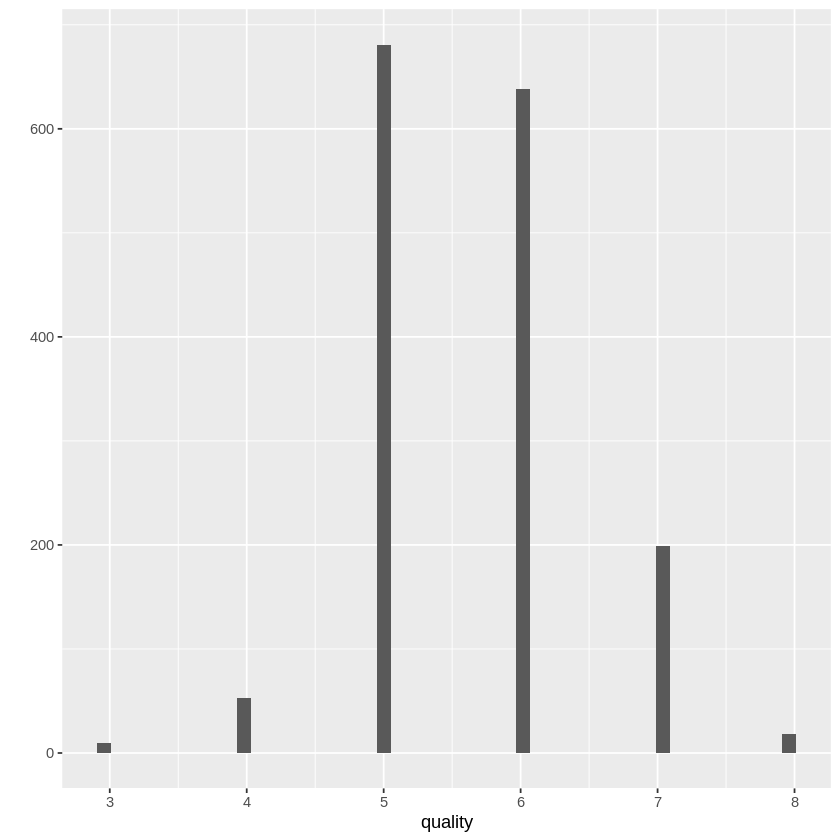

In [5]:
require(ggplot2)
qplot(wine_quality$quality,bins = 50,xlab='quality')

### What are the main features in the dataset?

Our variable of interest in the dataset will be quality. We have to identify the independent variables in the dataset which can explain the most of the variability in the dataset and predict the quality of the wine sample. The dataset includes 1599 observations and most of the wine samples have a quality of 5 or 6 with the minimum quality being 3 and maximum quality of 8.

The mean falls right between 5 and 6 at 5.636.

Let's go ahead and subset the dataset based on quality. If the wine quality is 3 or 4, we will subset the rows as bad quality. If the quality is 5 or 6 then subset the rows as medium quality. If the quality is 7 or 8, we will subset the rows as good quality. 

In [6]:
#Subset function helps you subset the data. It is one of the many ways you can form subsets from a dataset. The pipe operator 
#"|" works like binary `or` operator. "wine_quality$quality == 3 | wine_quality$quality == 4" will select rows where quality is 
#either 3 or 4.

# Another way to look at the subset operators for rows is as the 'WHERE' clause in SQL.

bad_quality <- subset(wine_quality,wine_quality$quality == 3 | wine_quality$quality == 4)
medium_quality <- subset(wine_quality,wine_quality$quality==5 | wine_quality$quality==6)
good_quality <- subset(wine_quality,wine_quality$quality==7 | wine_quality$quality==8)

#Make sure no rows are missed while you are subsetting the data. nrow will return number of rows in a dataframe.  
nrow(bad_quality)+nrow(medium_quality)+nrow(good_quality)

[1] 1599

We are not sure which variables are significant in predicting the quality of wine samples. We can go ahead and use bivariate plots of the relationship between quality and the rest of all of the independent variables in order to identify linear relationships.


The quality variable in wine_quality is an integer type variable. We cannot plot a boxplot using integers. We will convert it into a factor as shown below before graphing a box plot. 

In [7]:
wine_quality$quality=as.factor(wine_quality$quality)

Loading required package: gridExtra



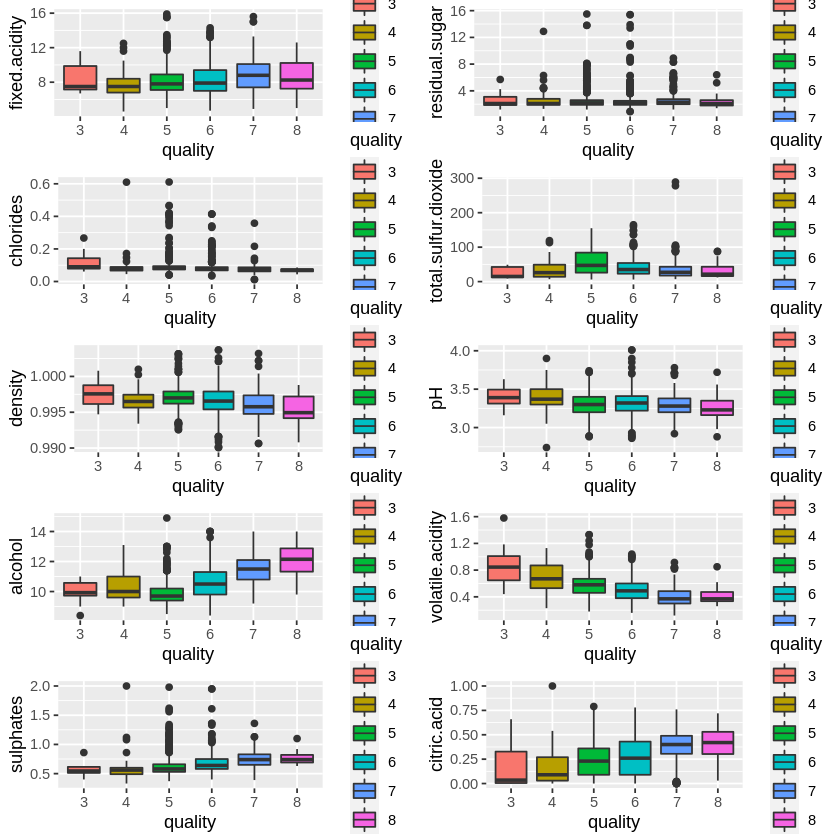

In [8]:
library(ggplot2)
require(gridExtra)

fixed_qua_box <- ggplot(wine_quality, aes(x=quality, y=fixed.acidity,fill=quality)) + geom_boxplot()
sugar_qua_box <- ggplot(wine_quality, aes(x=quality, y=residual.sugar,fill=quality)) + geom_boxplot()
chlorides_qua_box <- ggplot(wine_quality, aes(x=quality, y=chlorides,fill=quality)) + geom_boxplot()
total_sulfur_qua_box <- ggplot(wine_quality, aes(x=quality, y=total.sulfur.dioxide,fill=quality)) + geom_boxplot()
alcohol_qua_box <- ggplot(wine_quality, aes(x=quality, y=alcohol,fill=quality)) + geom_boxplot()
volatile_qua_box <- ggplot(wine_quality, aes(x=quality, y=volatile.acidity,fill=quality)) + geom_boxplot()
sulphates_qua_box <- ggplot(wine_quality, aes(x=quality, y=sulphates,fill=quality)) + geom_boxplot()
citric_qua_box <- ggplot(wine_quality, aes(x=quality, y=citric.acid,fill=quality)) + geom_boxplot()
density_qua_box <- ggplot(wine_quality, aes(x=quality, y=density,fill=quality)) + geom_boxplot()
ph_qua_box <- ggplot(wine_quality, aes(x=quality, y=pH,fill=quality)) + geom_boxplot()
grid.arrange(fixed_qua_box,sugar_qua_box,chlorides_qua_box,total_sulfur_qua_box,density_qua_box,ph_qua_box,alcohol_qua_box,
             volatile_qua_box,sulphates_qua_box,citric_qua_box,ncol=2,nrow=5)
# alcohol_qua_box

Alcohol, citric acid, sulphates and fixed.acidity show postive correlations with quality while volatile.acidity, pH and density have negative correlation. The alcohol level and citric acid level increases with increasing wine quality.

If two variables covary linearly then they both might give us the same kind of information. Both can explain the same amount of variation in the data. So when building a model, we try to skip those kind of variables which are related.

Let's plot scatter plots between the variables we identified above. 

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



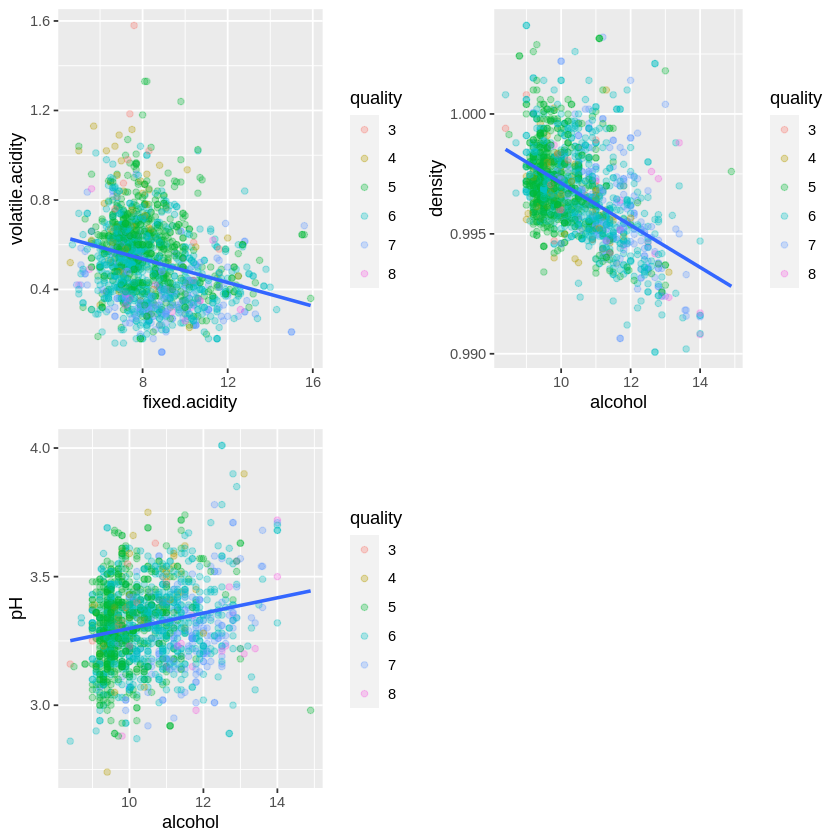

In [9]:
#pH and citric acid are related as both tell acidic nature of wine. Fixed.Acidity and volatile.acidity should tell us the same story. 
#We will see how alcohol varies with pH and density. Below plots illustrate the relationships. 

require(gridExtra)

volatile.acidity_fixed.acidity <- ggplot(wine_quality, aes(x=fixed.acidity, y=volatile.acidity))

alcohol_density <- ggplot(wine_quality, aes(x=alcohol, y=density))

alcohol_pH<- ggplot(wine_quality, aes(x=alcohol, y=pH))

grid.arrange(volatile.acidity_fixed.acidity+geom_point(aes(colour = quality),alpha = 0.3)+geom_smooth(method = "lm", se = FALSE), 
             alcohol_density+geom_point(aes(colour = quality),alpha = 0.3)+geom_smooth(method = "lm", se = FALSE),
             alcohol_pH+geom_point(aes(colour = quality),alpha = 0.3)+geom_smooth(method = "lm", se = FALSE),
             ncol=2,nrow=2)

The first plot shows the volatile.acidity/fixed.acidity relationship. Fixed.acidity and volatile.acidity vary inversly with each other. They have a relatively moderate negative relationship.

The second plot shows the negative relationship between density and alcohol. As the alcohol content increases, density of the wine decreases.

The relationship between alcohol and pH is strong and positive. The plot clearly shows as the alcohol content goes up, the pH  increases. 

**NOTE** An error is expected with the next cell.
Please run it, then continue reading.

In [10]:
cor.test(wine_quality$quality,wine_quality$alcohol)

ERROR: Error in cor.test.default(wine_quality$quality, wine_quality$alcohol): 'x' must be a numeric vector


Quality is a factor variable now. Let's convert it to numeric format to find pearson correlation coefficients for all independent variables against the response variable quality.

In [11]:
wine_quality$quality=as.numeric(wine_quality$quality)

In [12]:
cor.test(wine_quality$quality,wine_quality$alcohol)


	Pearson's product-moment correlation

data:  wine_quality$quality and wine_quality$alcohol
t = 21.639, df = 1597, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4373540 0.5132081
sample estimates:
      cor 
0.4761663 


Some of the scatter plots help identify relationships among the variables in the dataset. Below is list with their corresponding pearson correlation coefficients with respect to quality:

#### Positive Correlation

`Alcohol : 0.476`

`Sulphates : 0.251`

`Citric Acid: 0.226`

`Fixed Acidity: 0.124`

#### Negative Correlation

`Volatile Acidity : -0.391`

`Total SO2 : -0.185`

`Density : -0.175`

`Chlorides : -0.129`

The highest positive relationship we can see between any two variables is 0.476 which is not very significant. Citric acid is the next highly positively correlated feature while volatile.acidity and Total SO2 are negatively related.

In [13]:
wine_quality <- read.csv("/dsa/data/all_datasets/wine quality/winequality-red.csv", header = T, sep=";")

### Multivariate Plots Section

We were able to reduce the number of independent features to 4 from 11 which we think are significant in explaining the variability in the dataset and predicting wine quality. We know each of these variables correlate linearly with quality but we are not sure how they will correlate all together. Let's plot some 3D plots to visualize relationships between all the significant features.

In [14]:
head(wine_quality)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [15]:
for (i in 1:nrow(wine_quality))
{
  if(wine_quality$quality[i]==3)
      wine_quality$grade[i]='bad'
  if(wine_quality$quality[i]==4)
      wine_quality$grade[i]='bad'
  if(wine_quality$quality[i]==5)
      wine_quality$grade[i]='medium'
  if(wine_quality$quality[i]==6)
      wine_quality$grade[i]='medium'
  if(wine_quality$quality[i]==7)
      wine_quality$grade[i]='good'
  if(wine_quality$quality[i]==8)
      wine_quality$grade[i]='good'
}

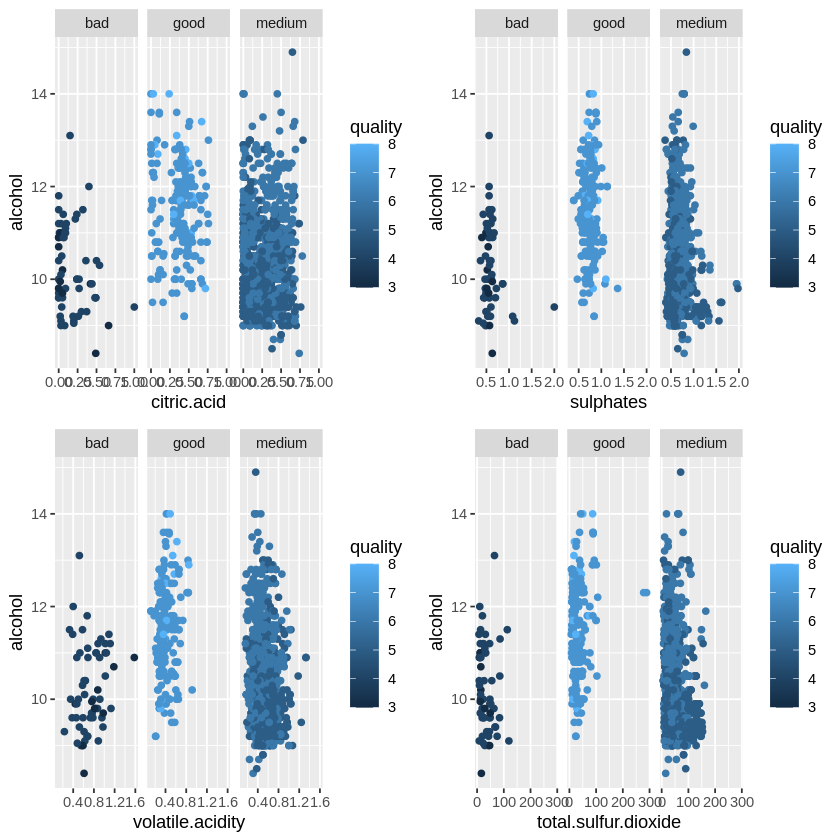

In [16]:
library(gridExtra)
grid.arrange(
ggplot(data = wine_quality,
       aes(x = citric.acid, y = alcohol, color = quality)) +
  geom_point() +
  facet_wrap(~grade),
    
    ggplot(data = wine_quality,
       aes(x = sulphates, y = alcohol, color = quality)) +
  geom_point() +
  facet_wrap(~grade),
    
    ggplot(data = wine_quality,
       aes(x = volatile.acidity, y = alcohol, color = quality)) +
  geom_point() +
  facet_wrap(~grade),
    
    ggplot(data = wine_quality,
       aes(x = total.sulfur.dioxide, y = alcohol, color = quality)) +
  geom_point() +
  facet_wrap(~grade),
    nrow=2,ncol=2)

Four features-- volatile.acidity, pH, sulhates and alcohol-- correlated with quality. The scatterplots above were faceted by grade to illustrate the population differences between good wines, average wines, and bad wines. Otherwise plots will be a bit crowded. It's clear that a higher citric acid and lower volatile (acetic) acid contributes towards better wines. Likewise, better wines tended to have higher sulphates and alcohol content. Surprisingly, pH had very little visual impact on wine quality, and was shadowed by the larger impact of alcohol. Interestingly, this shows that what makes a good wine depends on the type of acids that are present.

In [17]:
summary(wine_quality)

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

In [18]:
data=wine_quality[c("alcohol","volatile.acidity","sulphates","quality")]

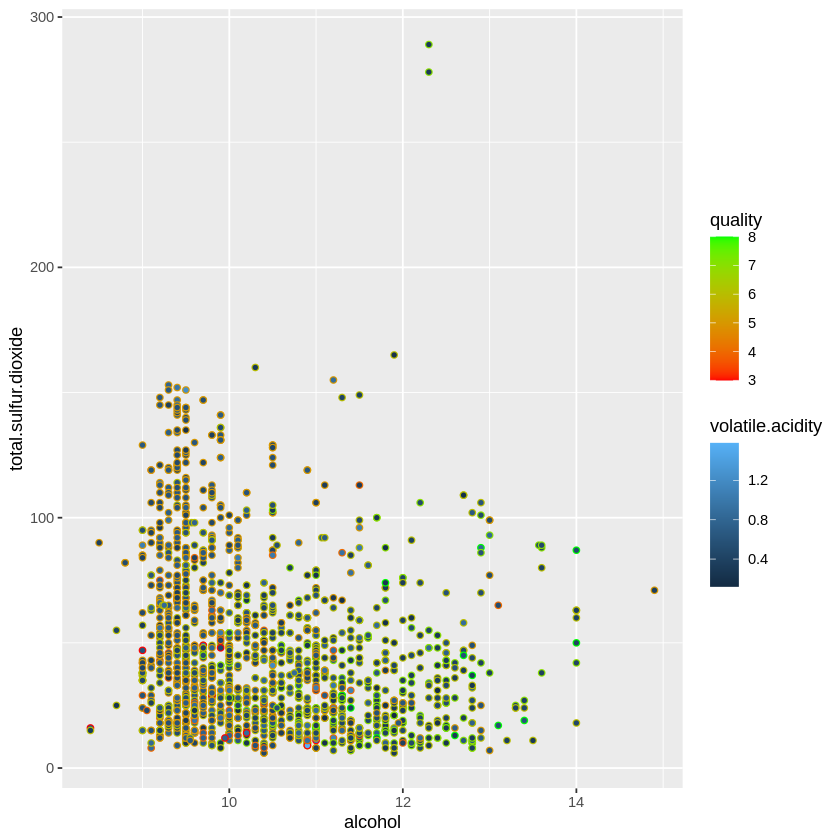

In [19]:
library(ggplot2)
ggplot(wine_quality, aes(x=alcohol, y=total.sulfur.dioxide, fill=volatile.acidity, color=quality)) + #, size=var5^2
  geom_point(shape=21) +
  scale_color_gradient(low="red", high="green") +
  scale_size_continuous(range=c(1,12))

In [20]:
#3d boxplot

# install.packages('scatterplot3d',repo='http://cran.us.r-project.org')
library(scatterplot3d)

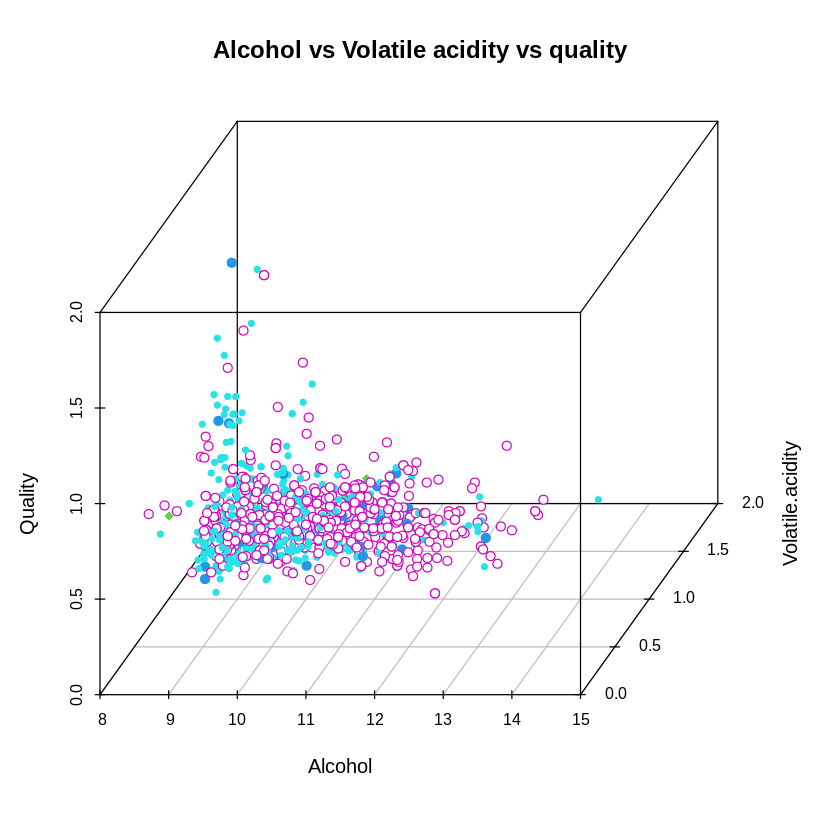

In [21]:
library(scatterplot3d)

# plot_3d <- scatterplot3d(data, type = "h", color = data$quality, angle = 55, scale.y = 0.7, pch = 16, 
#main = "Alcohol vs Volatile.acidity vs quality")
# plot_lm <- lm(data$quality ~ data$alcohol + data$volatile.acidity)
# plot_3d$plane3d(plot_lm)
# plot_3d$points3d(seq(10, 20, 2), seq(85, 60, -5), seq(60, 10, -10),col = "red", type = "h", pch = 8)
shapes = c(16, 17, 18,19,20,21) 
shapes <- shapes[as.numeric(data$quality)]
scatterplot3d(data,angle = 45,pch = shapes,
             main="Alcohol vs Volatile acidity vs quality",
              xlab = "Alcohol",
              ylab = "Volatile.acidity",
              zlab = "Quality")

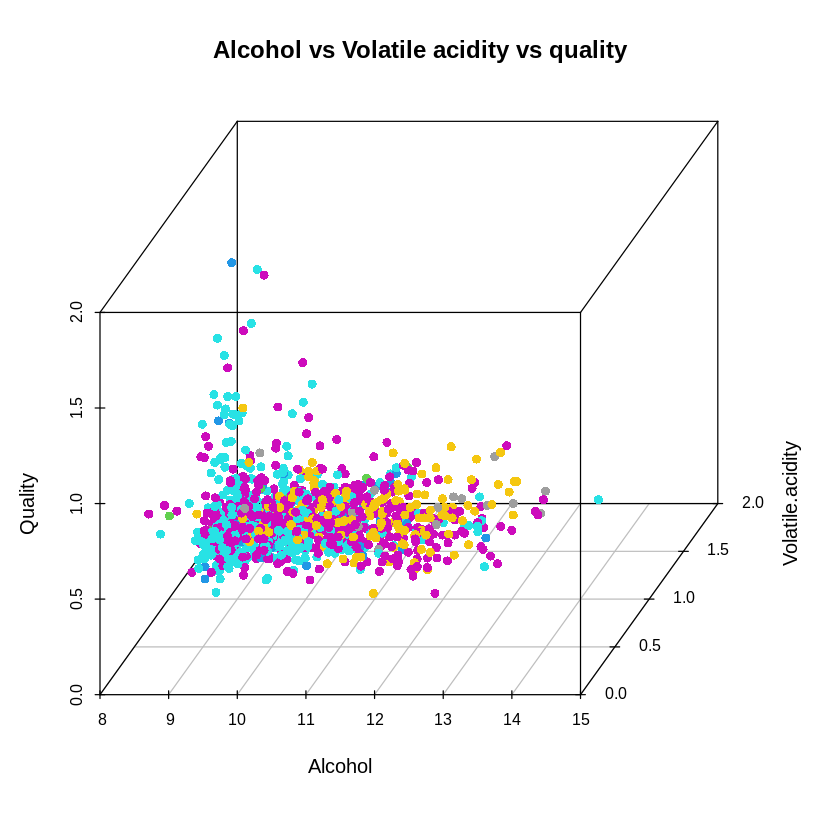

In [22]:
colors <- c("#999999", "#E69F00", "#56B4E9",'magenta','yellow','black')
colors <- colors[as.numeric(data$quality)]
plot<-scatterplot3d(data,angle = 45,color=colors,pch = 16,
              main="Alcohol vs Volatile acidity vs quality",
              xlab = "Alcohol",
              ylab = "Volatile.acidity",
              zlab = "Quality")

#               legend(plot$xyz.convert(14, 1.5, 5), legend = levels(data$quality),
#               col =  c("#999999", "#E69F00", "#56B4E9"), pch = 16)             